# Fuzzy C-Means

El siguiente código muestra cómo hacer un C-Means difuso:

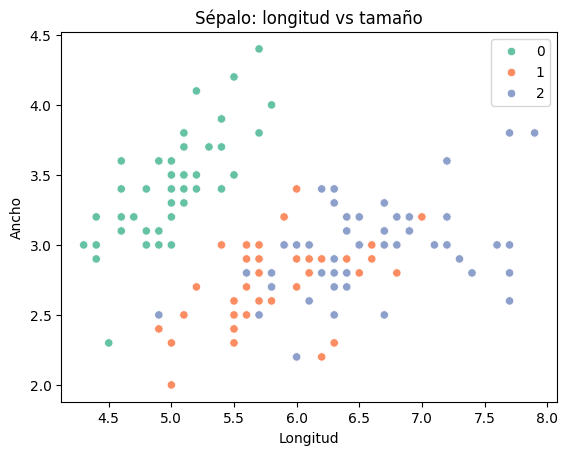

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from sklearn import datasets

# Carga de datos de Iris desde scikit-learn
iris = datasets.load_iris()
X = iris.data  # Características
y = iris.target  # Etiquetas

# Gráfico de dispersión para visualizar los clusters originales según las dos primeras características (sépalo)
g = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="Set2")
plt.title('Sépalo: longitud vs tamaño'), plt.xlabel('Longitud'), plt.ylabel('Ancho')
plt.show()

# Algoritmo Fuzzy C-Means
# Es necesario que los datos estén en un array 2D, por lo que se utiliza la función "reshape"
X2 = np.reshape(X.T, (X.shape[1], X.shape[0]))  # Cambio de forma de los datos

# Aplicación del modelo Fuzzy C-Means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X2, c=3, m=2, error=0.005, maxiter=1000, init=None, seed=111)

Entre los parámetros que devuelve la función `fuzz.cluster.cmeans` se pueden citar:
- `cntr` es el centro de los clusters
- `u` es el grado de membresía
- `u0` es la matriz inicial de membresía
- `d` es la matriz de distancias euclidiana

In [2]:
# Centro de los clusters
cluster_centers_df = pd.DataFrame(cntr, columns=['Longitud Sépalo', 'Ancho Sépalo', 'Longitud Pétalo', 'Ancho Pétalo'],
                                  index=['Cluster 1', 'Cluster 2', 'Cluster 3'])
cluster_centers_df

,Longitud Sépalo,Ancho Sépalo,Longitud Pétalo,Ancho Pétalo
Cluster 1,5.003965,3.414116,1.482771,0.253526
Cluster 2,5.888382,2.760871,4.363147,1.396900
Cluster 3,6.774346,3.052188,5.645952,2.053226


In [3]:
# Grados de membresía (probabilidad de pertenencia a cada cluster)
membership_df = pd.DataFrame(u.T, columns=['Cluster 1', 'Cluster 2', 'Cluster 3'])
membership_df.head()

,Cluster 1,Cluster 2,Cluster 3
0,0.996624,0.002304,0.001072
1,0.975838,0.016660,0.007502
2,0.979816,0.013767,0.006417
3,0.967408,0.022479,0.010112
4,0.994470,0.003762,0.001768


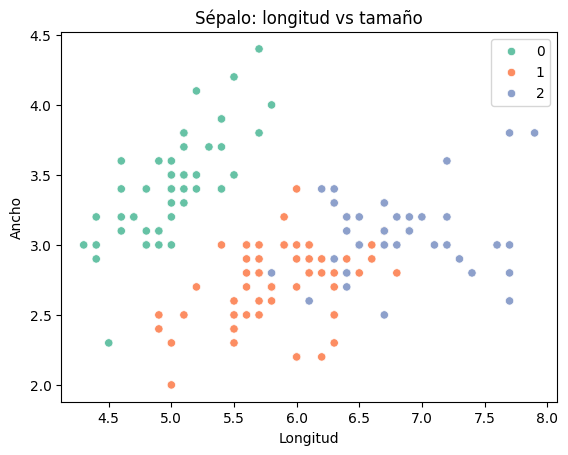

In [4]:
# Gráfico de dispersión para visualizar los clusters obtenidos
g = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=np.argmax(u.T, axis=1), palette="Set2")  # Asignación de colores según cluster
plt.title('Sépalo: longitud vs tamaño'), plt.xlabel('Longitud'), plt.ylabel('Ancho')
plt.show()